<a href="https://colab.research.google.com/github/irenekarijadi/Best-README-Template/blob/master/!2023_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import datetime

from numpy import array
from numpy import split
from numpy import concatenate

from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [ ]:
# load dataset
dataset1= read_csv("/content/raw.csv", header=0)
#dataset.drop(['Datetime'],axis=1,inplace=True)
#dataset.reset_index(drop=True , inplace=True)
print(dataset1.shape)

(8304, 25)


In [ ]:
dataset1

,Datetime,Hour,SZA,PW,Temp,DP,DHI,DNI,GHI,RH,...,IRR,Machine_Temp,PV,hour_sin,hour_cos,Seasonal,Trend,Date,wx,wy
0,01-01-20 0:00,0,179.35,2.2,17.1,12.1,0,0,0,72.63,...,0.0,0.0,0.0,0.000000,1.000000,-79.188921,51.250731,01-01-20 0:00,2.527947,2.121199
1,01-01-20 1:00,1,166.55,2.2,17.1,12.2,0,0,0,72.70,...,0.0,0.0,0.0,0.258819,0.965926,-79.168295,51.461222,01-01-20 1:00,2.182395,2.340332
2,01-01-20 2:00,2,152.77,2.2,17.1,12.2,0,0,0,72.77,...,0.0,0.0,0.0,0.500000,0.866025,-79.150827,51.671712,01-01-20 2:00,1.880913,2.588854
3,01-01-20 3:00,3,139.06,2.2,17.1,12.2,0,0,0,72.75,...,0.0,0.0,0.0,0.707107,0.707107,-79.139549,51.882203,01-01-20 3:00,1.596618,2.657219
4,01-01-20 4:00,4,125.47,2.2,17.1,12.2,0,0,0,72.89,...,0.0,0.0,0.0,0.866025,0.500000,-79.135384,52.092693,01-01-20 4:00,1.502910,2.711321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,12/31/2020 19:00,19,111.37,2.0,17.5,11.5,0,0,0,68.05,...,0.0,0.0,0.0,-0.965926,0.258819,-79.122735,12.558191,31-12-20 19:00,1.039267,2.707383
8300,12/31/2020 20:00,20,124.74,2.0,17.2,11.7,0,0,0,70.01,...,0.0,0.0,0.0,-0.866025,0.500000,-79.114949,12.139347,31-12-20 20:00,1.805445,2.395907
8301,12/31/2020 21:00,21,138.31,2.1,17.1,11.8,0,0,0,70.98,...,0.0,0.0,0.0,-0.707107,0.707107,-79.104830,11.720502,31-12-20 21:00,2.486867,2.013825
8302,12/31/2020 22:00,22,152.02,2.1,17.2,11.9,0,0,0,71.13,...,0.0,0.0,0.0,-0.500000,0.866025,-79.095924,11.301657,31-12-20 22:00,2.851480,1.851773


In [ ]:
dataset1['timestamp'] = pd.to_datetime(dataset1['Date'])

In [ ]:
dataset1

,Datetime,Hour,SZA,PW,Temp,DP,DHI,DNI,GHI,RH,...,Machine_Temp,PV,hour_sin,hour_cos,Seasonal,Trend,Date,wx,wy,timestamp
0,01-01-20 0:00,0,179.35,2.2,17.1,12.1,0,0,0,72.63,...,0.0,0.0,0.000000,1.000000,-79.188921,51.250731,01-01-20 0:00,2.527947,2.121199,2020-01-01 00:00:00
1,01-01-20 1:00,1,166.55,2.2,17.1,12.2,0,0,0,72.70,...,0.0,0.0,0.258819,0.965926,-79.168295,51.461222,01-01-20 1:00,2.182395,2.340332,2020-01-01 01:00:00
2,01-01-20 2:00,2,152.77,2.2,17.1,12.2,0,0,0,72.77,...,0.0,0.0,0.500000,0.866025,-79.150827,51.671712,01-01-20 2:00,1.880913,2.588854,2020-01-01 02:00:00
3,01-01-20 3:00,3,139.06,2.2,17.1,12.2,0,0,0,72.75,...,0.0,0.0,0.707107,0.707107,-79.139549,51.882203,01-01-20 3:00,1.596618,2.657219,2020-01-01 03:00:00
4,01-01-20 4:00,4,125.47,2.2,17.1,12.2,0,0,0,72.89,...,0.0,0.0,0.866025,0.500000,-79.135384,52.092693,01-01-20 4:00,1.502910,2.711321,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,12/31/2020 19:00,19,111.37,2.0,17.5,11.5,0,0,0,68.05,...,0.0,0.0,-0.965926,0.258819,-79.122735,12.558191,31-12-20 19:00,1.039267,2.707383,2020-12-31 19:00:00
8300,12/31/2020 20:00,20,124.74,2.0,17.2,11.7,0,0,0,70.01,...,0.0,0.0,-0.866025,0.500000,-79.114949,12.139347,31-12-20 20:00,1.805445,2.395907,2020-12-31 20:00:00
8301,12/31/2020 21:00,21,138.31,2.1,17.1,11.8,0,0,0,70.98,...,0.0,0.0,-0.707107,0.707107,-79.104830,11.720502,31-12-20 21:00,2.486867,2.013825,2020-12-31 21:00:00
8302,12/31/2020 22:00,22,152.02,2.1,17.2,11.9,0,0,0,71.13,...,0.0,0.0,-0.500000,0.866025,-79.095924,11.301657,31-12-20 22:00,2.851480,1.851773,2020-12-31 22:00:00


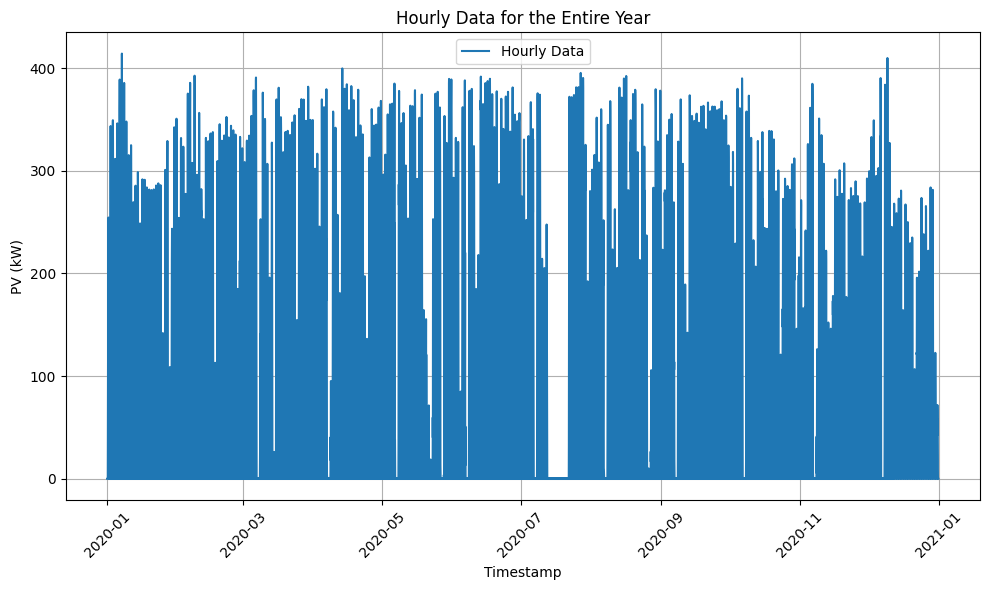

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(dataset1['timestamp'], dataset1['PV'], label='Hourly Data')
plt.xlabel('Timestamp')
plt.ylabel('PV (kW)')
plt.title('Hourly Data for the Entire Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

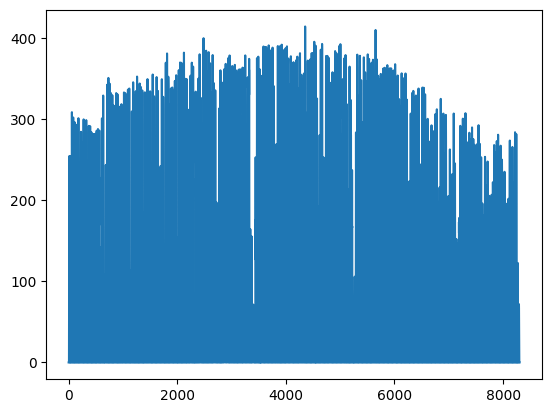

In [ ]:
plt.plot(dataset1['PV'])

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Sample data (using pandas DataFrames)
data1 = pd.DataFrame(dataset1['PV'])
#total 21 pred var-> 19
#data2 = pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','WD','WS','Sun','IRR','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])

data2 = pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Sun','IRR','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])

#data2 = pd.DataFrame(dataset1[['PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','IRR','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])
data2

,SZA,PW,Temp,DP,DHI,DNI,GHI,RH,SA,P,Sun,IRR,Machine_Temp,hour_sin,hour_cos,Seasonal,Trend,wx,wy
0,179.35,2.2,17.1,12.1,0,0,0,72.63,0.14,1050,0,0.0,0.0,0.000000,1.000000,-79.188921,51.250731,2.527947,2.121199
1,166.55,2.2,17.1,12.2,0,0,0,72.70,0.14,1049,0,0.0,0.0,0.258819,0.965926,-79.168295,51.461222,2.182395,2.340332
2,152.77,2.2,17.1,12.2,0,0,0,72.77,0.14,1049,0,0.0,0.0,0.500000,0.866025,-79.150827,51.671712,1.880913,2.588854
3,139.06,2.2,17.1,12.2,0,0,0,72.75,0.14,1048,0,0.0,0.0,0.707107,0.707107,-79.139549,51.882203,1.596618,2.657219
4,125.47,2.2,17.1,12.2,0,0,0,72.89,0.14,1049,0,0.0,0.0,0.866025,0.500000,-79.135384,52.092693,1.502910,2.711321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,111.37,2.0,17.5,11.5,0,0,0,68.05,0.14,1050,0,0.0,0.0,-0.965926,0.258819,-79.122735,12.558191,1.039267,2.707383
8300,124.74,2.0,17.2,11.7,0,0,0,70.01,0.14,1050,0,0.0,0.0,-0.866025,0.500000,-79.114949,12.139347,1.805445,2.395907
8301,138.31,2.1,17.1,11.8,0,0,0,70.98,0.14,1050,0,0.0,0.0,-0.707107,0.707107,-79.104830,11.720502,2.486867,2.013825
8302,152.02,2.1,17.2,11.9,0,0,0,71.13,0.14,1050,0,0.0,0.0,-0.500000,0.866025,-79.095924,11.301657,2.851480,1.851773


In [ ]:


# Get column names
columns_data1 = data1.columns
columns_data2 = data2.columns

# Iterate through all possible pairs of columns
for col1 in columns_data1:
    for col2 in columns_data2:
        correlation, _ = spearmanr(data1[col1], data2[col2])

        if correlation > 0.3:
            print(f"Correlation between {col1} of data1 and {col2} of data2: {correlation:.4f}")


Correlation between PV of data1 and Temp of data2: 0.5015
Correlation between PV of data1 and DHI of data2: 0.9202
Correlation between PV of data1 and DNI of data2: 0.8916
Correlation between PV of data1 and GHI of data2: 0.9598
Correlation between PV of data1 and Sun of data2: 0.8809
Correlation between PV of data1 and IRR of data2: 0.9858
Correlation between PV of data1 and Machine_Temp of data2: 0.9523
Correlation between PV of data1 and Seasonal of data2: 0.9056


In [ ]:
pip install shap

In [ ]:
import xgboost
import shap


In [ ]:
#X_baru = dataset1[['DHI','DNI','GHI','Machine_Temp','Seasonal','Temp','IRR']]

X_baru= pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Sun','IRR','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])
#X_baru= dataset1[['PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']]
#X_baru = dataset1[['Temp']]

y = dataset1['PV']

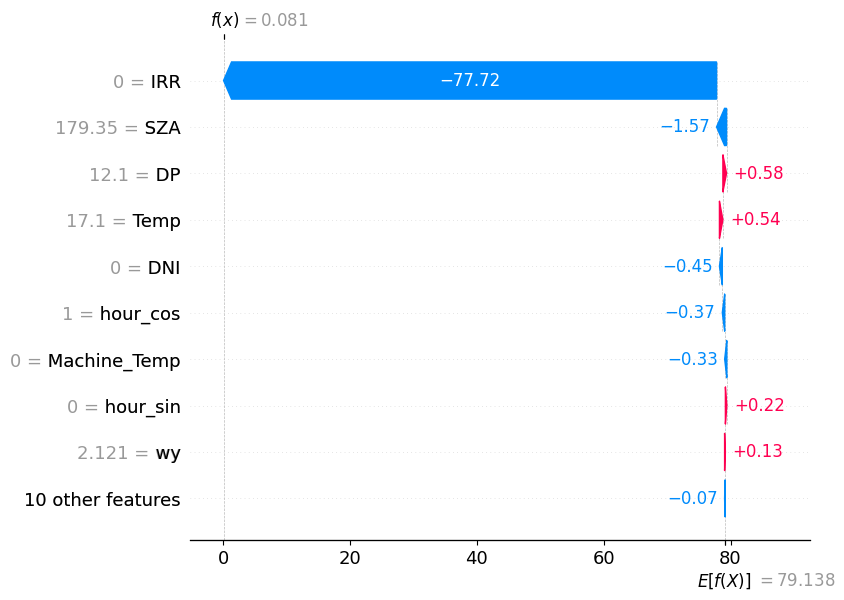

In [ ]:
#from sklearn.ensemble import RandomForestRegressor#
##regr=RandomForestRegressor(max_depth=2, random_state=0)
#model=regr.fit(X_baru, y)



model = xgboost.XGBRegressor().fit(X_baru, y)



# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_baru)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


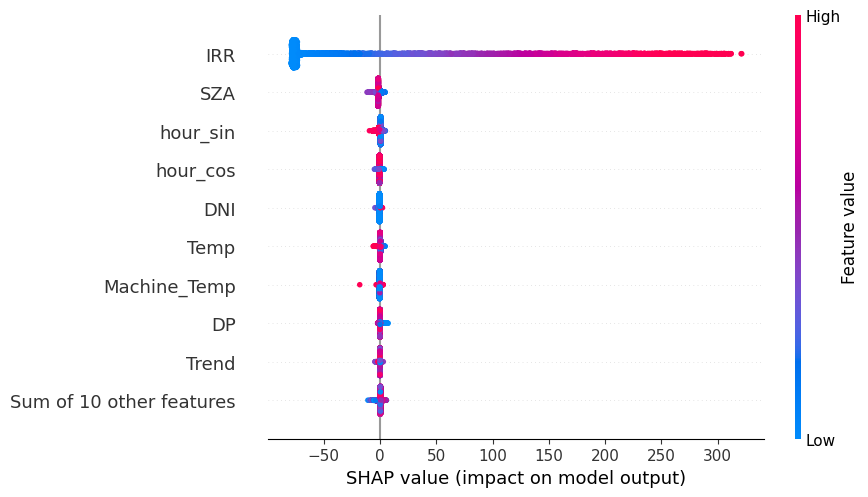

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

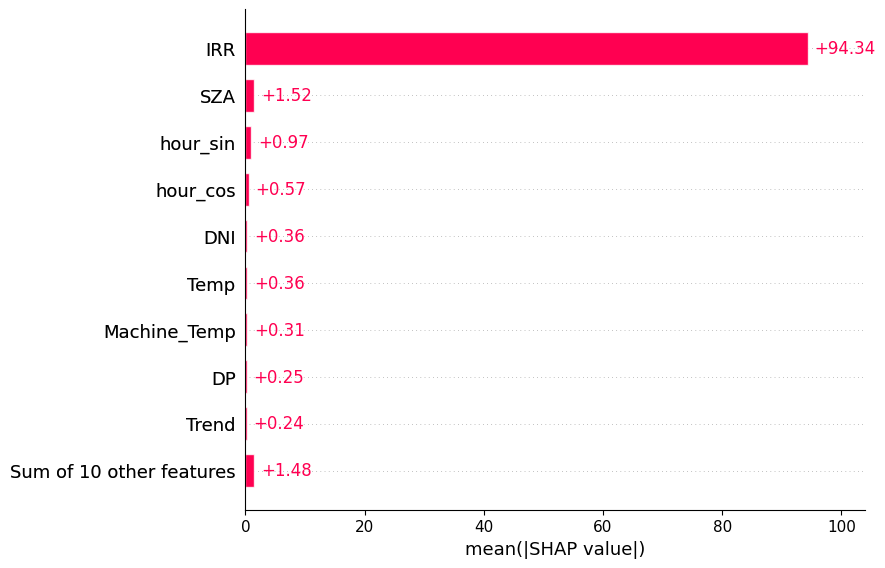

In [ ]:
shap.plots.bar(shap_values)

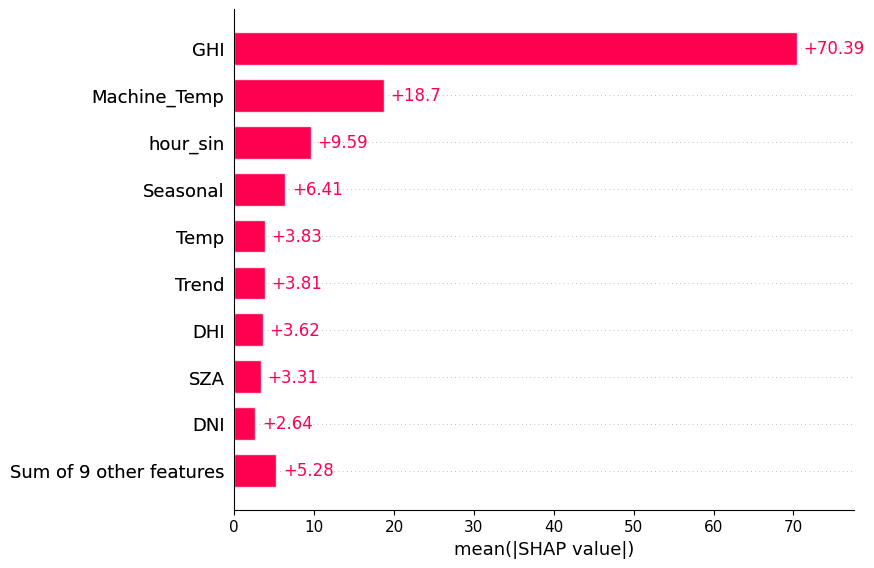

In [ ]:
#X_baru = dataset1[['DHI','DNI','GHI','Machine_Temp','Seasonal','Temp']]
#X_baru= dataset1[['PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']]

X_baru= pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Sun','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])
#X_baru = dataset1[['Temp']]

y = dataset1['PV']

model = xgboost.XGBRegressor().fit(X_baru, y)



# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_baru)

shap.plots.bar(shap_values)


In [ ]:
###GHI, Machine temp,hour sin, seasonal, temp, trend, dhi, sza, dni

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


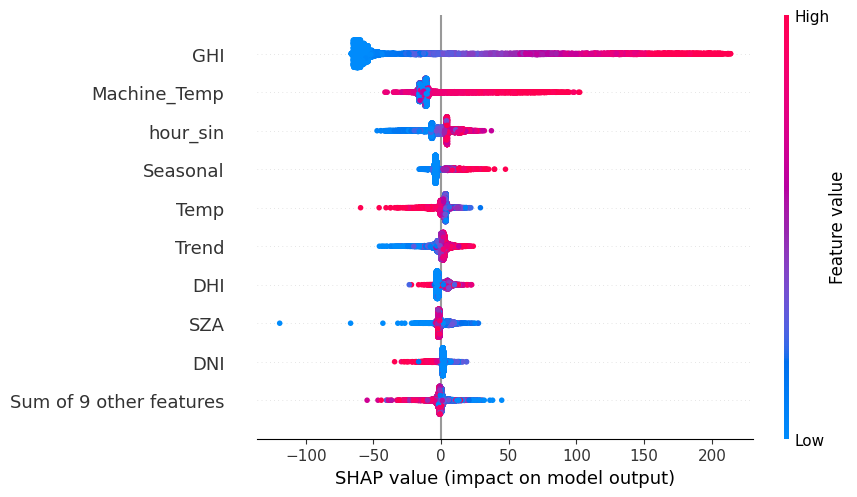

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 18
[LightGBM] [Info] Start training from score 79.138002


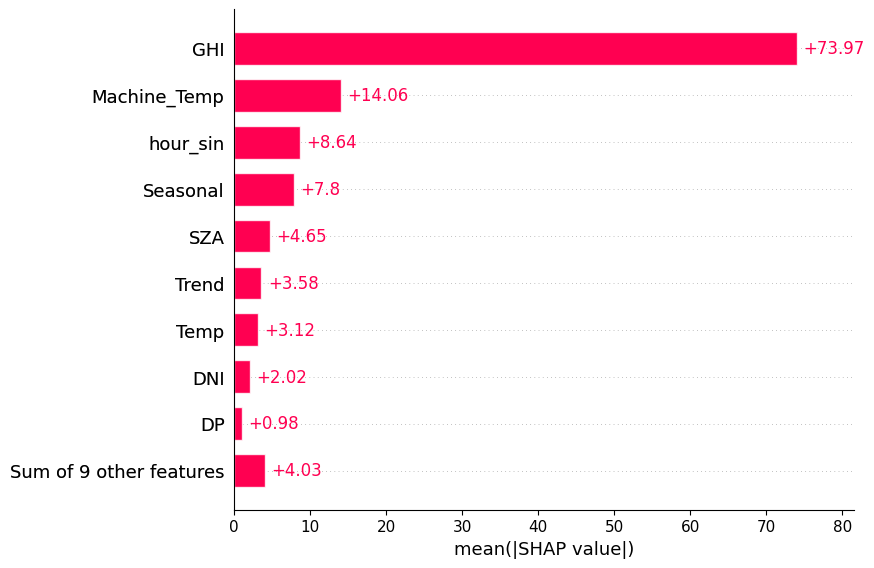

In [ ]:
import pandas as pd
import shap
import lightgbm as lgb

# Load your dataset and prepare X and y

X_baru = pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Sun','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])
y = dataset1['PV']

# Create a LightGBM model
model_lgb = lgb.LGBMRegressor().fit(X_baru, y)

# Explain the model's predictions using SHAP
explainer_lgb = shap.Explainer(model_lgb)
shap_values_lgb = explainer_lgb(X_baru)

# Plot SHAP feature importance
shap.plots.bar(shap_values_lgb)


In [ ]:
###GHI, Machine temp,hour sin, seasonal, temp, trend, dhi, sza, dni

In [ ]:
###GHI, Machine temp,hour sin, seasonal, sza, trend, temp, dni, dp

In [ ]:
#GHI, machine_temp, seasonal, DHI, hour_sin,hour_cos,Trend, SUn, dni

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.7 MB/s eta 0:00:00


Learning rate set to 0.057204
0:	learn: 108.7807103	total: 50.6ms	remaining: 50.5s
1:	learn: 103.2302564	total: 53.9ms	remaining: 26.9s
2:	learn: 97.9132336	total: 57.2ms	remaining: 19s
3:	learn: 93.0553494	total: 60.5ms	remaining: 15.1s
4:	learn: 88.4126005	total: 64.2ms	remaining: 12.8s
5:	learn: 83.9396192	total: 67.6ms	remaining: 11.2s
6:	learn: 79.9528324	total: 70.8ms	remaining: 10s
7:	learn: 76.1067153	total: 74ms	remaining: 9.18s
8:	learn: 72.5075237	total: 78.2ms	remaining: 8.61s
9:	learn: 69.1039010	total: 81.3ms	remaining: 8.05s
10:	learn: 65.8894961	total: 84.2ms	remaining: 7.57s
11:	learn: 62.9187097	total: 87ms	remaining: 7.16s
12:	learn: 60.1512946	total: 90.1ms	remaining: 6.84s
13:	learn: 57.4757930	total: 93.2ms	remaining: 6.56s
14:	learn: 55.0395367	total: 96.2ms	remaining: 6.32s
15:	learn: 52.6988472	total: 99.3ms	remaining: 6.11s
16:	learn: 50.4422229	total: 103ms	remaining: 5.93s
17:	learn: 48.3393583	total: 105ms	remaining: 5.75s
18:	learn: 46.4434071	total: 109ms

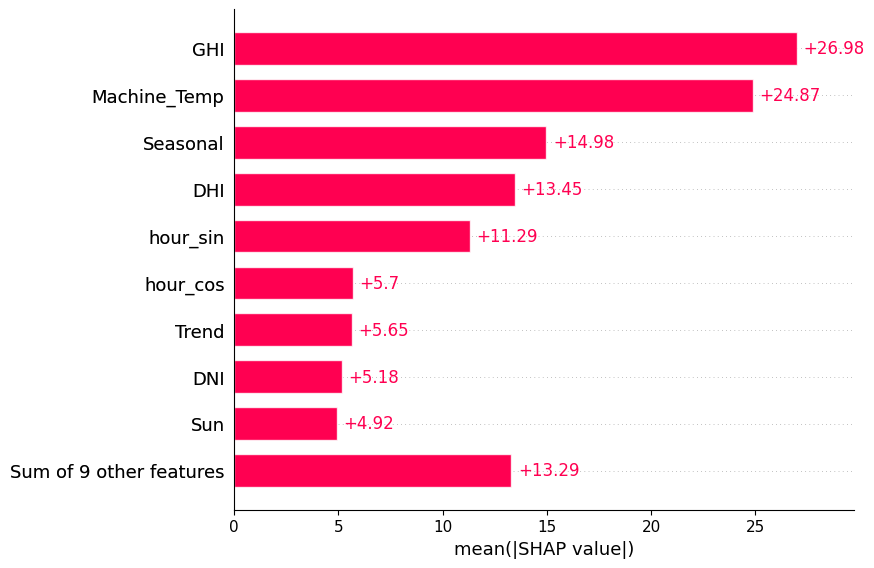

In [ ]:
import pandas as pd
import shap
from catboost import CatBoostRegressor

# Load your dataset and prepare X and y

X_baru = pd.DataFrame(dataset1[['SZA','PW','Temp','DP','DHI','DNI','GHI','RH','SA','P','Sun','Machine_Temp','hour_sin','hour_cos','Seasonal','Trend','wx','wy']])
y = dataset1['PV']

# Create a CatBoost model
model_catboost = CatBoostRegressor().fit(X_baru, y)

# Explain the model's predictions using SHAP
explainer_catboost = shap.Explainer(model_catboost)
shap_values_catboost = explainer_catboost(X_baru)

# Plot SHAP feature importance
shap.plots.bar(shap_values_catboost)


In [ ]:
#GHI, machine_temp, seasonal, DHI, hour_sin,hour_cos,Trend, SUn

In [ ]:
plt.title('SHAP Heatmap Plot')
shap.plots.heatmap(shap_values, max_display=12, show=False)
plt.gcf().axes[-1].set_box_aspect(100)
plt.ylabel('Features')
plt.show()

In [ ]:
X_baru

,DHI,DNI,GHI,Machine_Temp,Seasonal,Temp,IRR
0,0,0,0,0.0,-79.188921,17.1,0.0
1,0,0,0,0.0,-79.168295,17.1,0.0
2,0,0,0,0.0,-79.150827,17.1,0.0
3,0,0,0,0.0,-79.139549,17.1,0.0
4,0,0,0,0.0,-79.135384,17.1,0.0
...,...,...,...,...,...,...,...
8299,0,0,0,0.0,-79.122735,17.5,0.0
8300,0,0,0,0.0,-79.114949,17.2,0.0
8301,0,0,0,0.0,-79.104830,17.1,0.0
8302,0,0,0,0.0,-79.095924,17.2,0.0


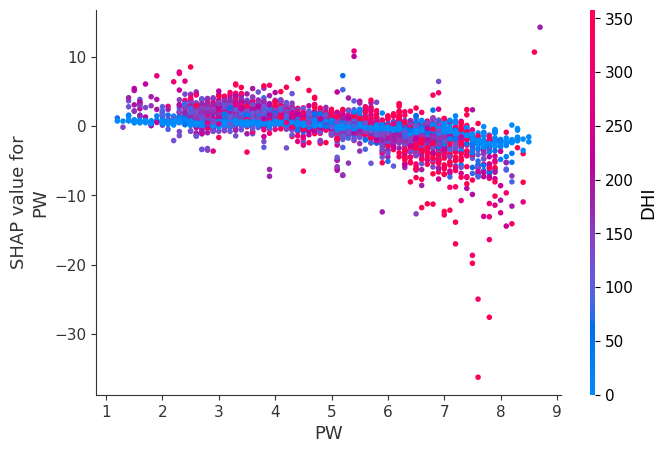

In [ ]:
shap_values = explainer.shap_values(X_baru)
shap.dependence_plot(0, shap_values, X_baru)

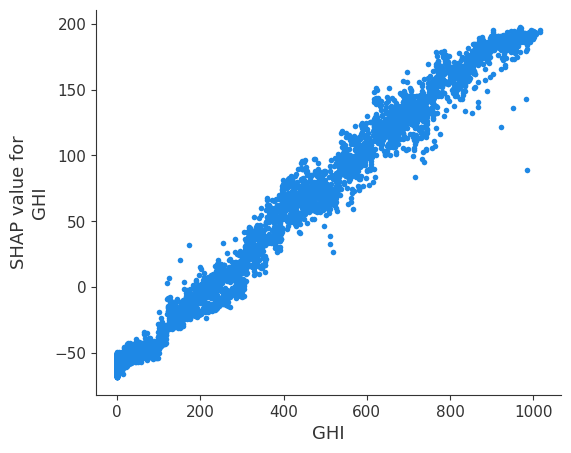

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("GHI", shap_values, X_baru, interaction_index=None)

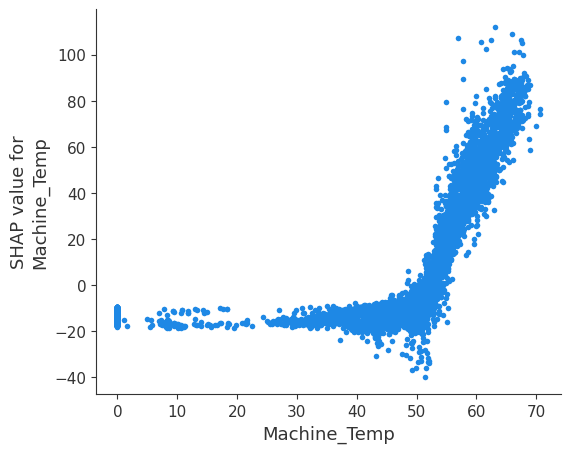

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("Machine_Temp", shap_values, X_baru, interaction_index=None)

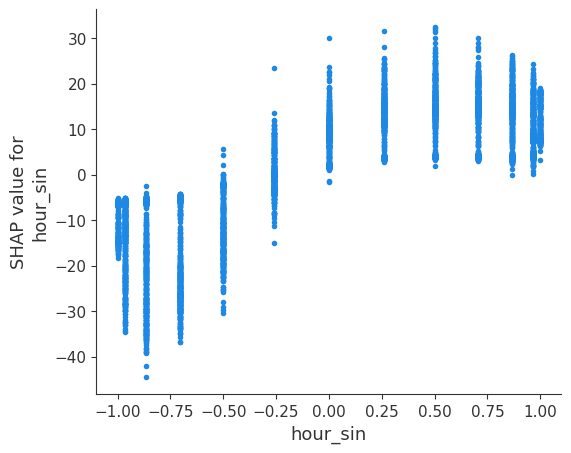

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("hour_sin", shap_values, X_baru, interaction_index=None)

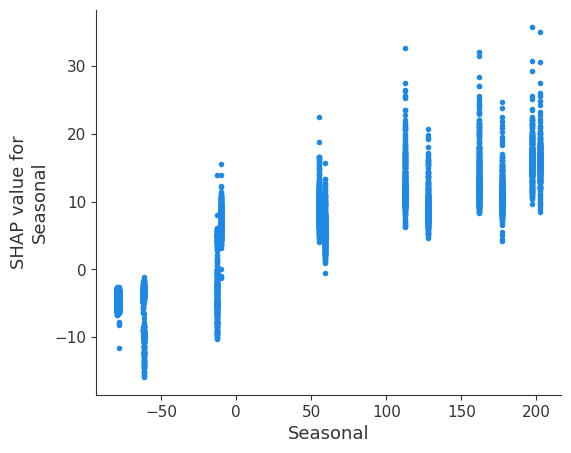

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("Seasonal", shap_values, X_baru, interaction_index=None)

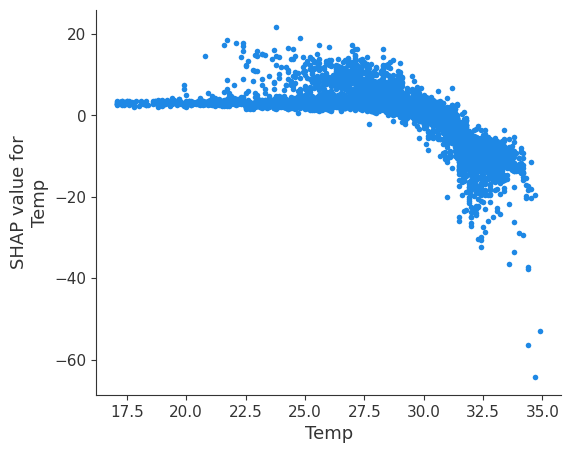

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("Temp", shap_values, X_baru, interaction_index=None)

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("Temp", shap_values, X_baru, interaction_index=None)

In [ ]:
shap_values = explainer.shap_values(X_baru)
# we can turn off interaction coloring
shap.dependence_plot("Temp", shap_values, X_baru, interaction_index=None)

In [ ]:
january=dataset1[(dataset1['timestamp']>'2020-01-01 00:00:00') & (dataset1['timestamp']<'2020-02-01 00:00:00')]
january

,Datetime,Hour,SZA,PW,Temp,DP,DHI,DNI,GHI,RH,...,Machine_Temp,PV,hour_sin,hour_cos,Seasonal,Trend,Date,wx,wy,timestamp
1,01-01-20 1:00,1,166.55,2.2,17.1,12.2,0,0,0,72.70,...,0.0,0.0,0.258819,0.965926,-79.168295,51.461222,01-01-20 1:00,2.182395,2.340332,2020-01-01 01:00:00
2,01-01-20 2:00,2,152.77,2.2,17.1,12.2,0,0,0,72.77,...,0.0,0.0,0.500000,0.866025,-79.150827,51.671712,01-01-20 2:00,1.880913,2.588854,2020-01-01 02:00:00
3,01-01-20 3:00,3,139.06,2.2,17.1,12.2,0,0,0,72.75,...,0.0,0.0,0.707107,0.707107,-79.139549,51.882203,01-01-20 3:00,1.596618,2.657219,2020-01-01 03:00:00
4,01-01-20 4:00,4,125.47,2.2,17.1,12.2,0,0,0,72.89,...,0.0,0.0,0.866025,0.500000,-79.135384,52.092693,01-01-20 4:00,1.502910,2.711321,2020-01-01 04:00:00
5,01-01-20 5:00,5,112.08,2.2,17.1,12.2,0,0,0,72.71,...,0.0,0.0,0.965926,0.258819,-78.255601,52.303184,01-01-20 5:00,1.500000,2.598076,2020-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,12-01-20 19:00,19,114.16,3.7,25.4,19.4,0,0,0,69.52,...,0.0,0.0,-0.965926,0.258819,-79.122735,60.774113,01-12-20 19:00,3.471473,1.545599,2020-01-12 19:00:00
7580,12-01-20 20:00,20,127.67,3.6,25.1,19.2,0,0,0,69.62,...,0.0,0.0,-0.866025,0.500000,-79.114949,60.023557,01-12-20 20:00,3.958171,1.680144,2020-01-12 20:00:00
7581,12-01-20 21:00,21,141.34,3.5,24.9,18.9,0,0,0,69.24,...,0.0,0.0,-0.707107,0.707107,-79.104830,59.082562,01-12-20 21:00,4.202309,1.870989,2020-01-12 21:00:00
7582,12-01-20 22:00,22,155.13,3.4,24.7,18.7,0,0,0,69.24,...,0.0,0.0,-0.500000,0.866025,-79.095924,62.210359,01-12-20 22:00,4.314211,2.104182,2020-01-12 22:00:00


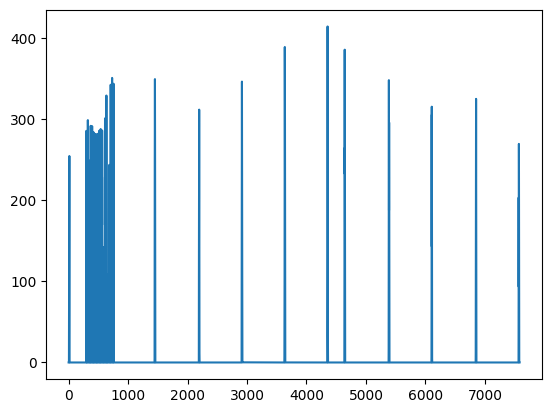

In [ ]:
plt.plot(january['PV'])

In [ ]:
january.set_index('timestamp', inplace=True)

In [ ]:
january

,Datetime,Hour,SZA,PW,Temp,DP,DHI,DNI,GHI,RH,...,IRR,Machine_Temp,PV,hour_sin,hour_cos,Seasonal,Trend,Date,wx,wy
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,01-01-20 1:00,1,166.55,2.2,17.1,12.2,0,0,0,72.70,...,0.0,0.0,0.0,0.258819,0.965926,-79.168295,51.461222,01-01-20 1:00,2.182395,2.340332
2020-01-01 02:00:00,01-01-20 2:00,2,152.77,2.2,17.1,12.2,0,0,0,72.77,...,0.0,0.0,0.0,0.500000,0.866025,-79.150827,51.671712,01-01-20 2:00,1.880913,2.588854
2020-01-01 03:00:00,01-01-20 3:00,3,139.06,2.2,17.1,12.2,0,0,0,72.75,...,0.0,0.0,0.0,0.707107,0.707107,-79.139549,51.882203,01-01-20 3:00,1.596618,2.657219
2020-01-01 04:00:00,01-01-20 4:00,4,125.47,2.2,17.1,12.2,0,0,0,72.89,...,0.0,0.0,0.0,0.866025,0.500000,-79.135384,52.092693,01-01-20 4:00,1.502910,2.711321
2020-01-01 05:00:00,01-01-20 5:00,5,112.08,2.2,17.1,12.2,0,0,0,72.71,...,0.0,0.0,0.0,0.965926,0.258819,-78.255601,52.303184,01-01-20 5:00,1.500000,2.598076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-12 19:00:00,12-01-20 19:00,19,114.16,3.7,25.4,19.4,0,0,0,69.52,...,0.0,0.0,0.0,-0.965926,0.258819,-79.122735,60.774113,01-12-20 19:00,3.471473,1.545599
2020-01-12 20:00:00,12-01-20 20:00,20,127.67,3.6,25.1,19.2,0,0,0,69.62,...,0.0,0.0,0.0,-0.866025,0.500000,-79.114949,60.023557,01-12-20 20:00,3.958171,1.680144
2020-01-12 21:00:00,12-01-20 21:00,21,141.34,3.5,24.9,18.9,0,0,0,69.24,...,0.0,0.0,0.0,-0.707107,0.707107,-79.104830,59.082562,01-12-20 21:00,4.202309,1.870989


In [ ]:
y=pd.DataFrame(january['PV']).reset_index()
y

,timestamp,PV
0,2020-01-01 01:00:00,0.0
1,2020-01-01 02:00:00,0.0
2,2020-01-01 03:00:00,0.0
3,2020-01-01 04:00:00,0.0
4,2020-01-01 05:00:00,0.0
...,...,...
738,2020-01-12 19:00:00,0.0
739,2020-01-12 20:00:00,0.0
740,2020-01-12 21:00:00,0.0
741,2020-01-12 22:00:00,0.0


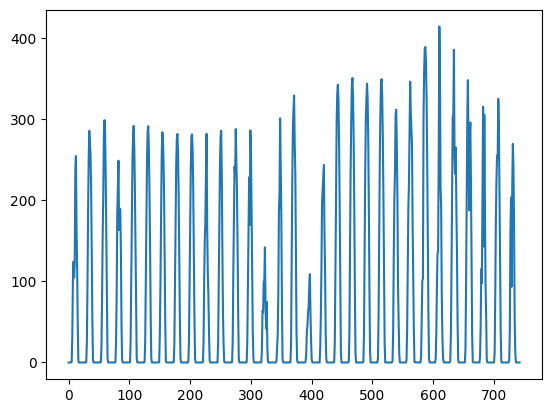

In [ ]:
plt.plot(y['PV'])

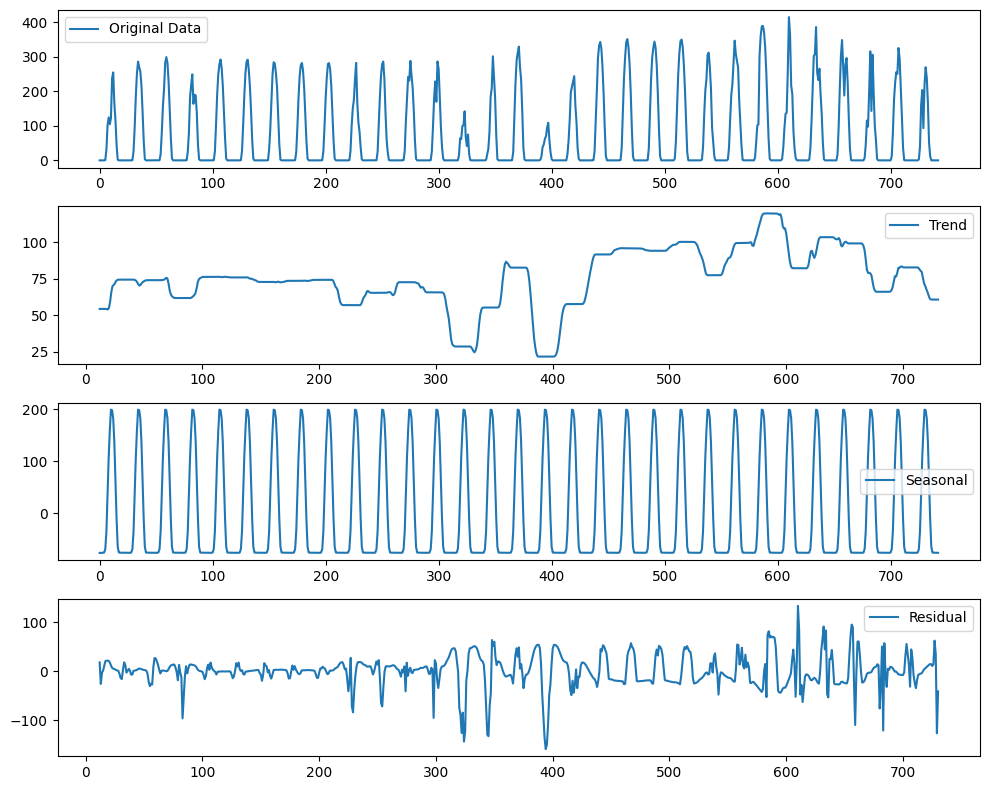

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some example time series data
np.random.seed(0)

# Create a DataFrame


# Perform seasonal decomposition using additive model
decomposition = seasonal_decompose(y['PV'],model='additive',period=24)

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(y.index, y['PV'], label='Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(y.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(y.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(y.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()